### Neshyba 2023


# Harmonic Oscillator

### Hamiltonian of a vibrating diatomic molecule

The context of this exercise is that of a vibrating diatomic molecule, something like the one shown at https://sustainablenano.files.wordpress.com/2020/05/molecule.gif?w=500. 

The Schrödinger equation describing such motion diatomic molecule looks like the usual 

$$
H\psi=E\psi \ \ \ \ (1)
$$

We'll be solving this equation by diagonalizing the matrix form of $H$, in the position representation, in more or less the same way we have done previously -- with important differences described below.

### Potential energy
The *potential energy* part of the Hamiltonian of a harmonic oscillator is given by

$$
V(x) = {1 \over 2}kx^2 \ \ \ \ (2)
$$

where we think of $x$ as the *displacement* from the bond's equilibrium value, rather than some absolute coordinate. Specifically:

- $x=0$ means the bond is at its equilibrium (lowest-energy) distance;
- $x>0$ means we're *stretching* the bond; and 
- $x<0$ means we're *compressing* the bond. 

$k$ is called the *force constant* of the bond. In general, a bigger $k$ means a stiffer bond that vibrates faster, whereas a smaller $k$ means a wimpier, floppier bond. Literature values are available in Herschbach and Laurie, 1961 (https://www.osti.gov/biblio/4837972/); see their *Table II, Quadratic, Cubic, and Quartic Vibrational Force Constants for Diatomic Molecules* (starting on II-2, about 2/3 of the way through the document). Units they use for $F_2$ are given on their page 4.

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/Herschbach and Laurie.jpg" height="500" width="500"/>
<strong>Figure 1</strong>. Page from Herschbach and Laurie, 1961. Force constants are given the 6th column, in units $10^5 dyne/cm$ -- so for example, $k_{HCl}=5.158 \times 10^5 dyne/cm$.
</p>

As previously, when constructing the Hamiltonian matrix in the position representation, $V(x)$ values appear on the diagonal. 

### Kinetic energy
The *kinetic energy* part of the Hamiltonian is given by

$$
-{\hbar^2 \over 2\mu} \nabla^2 \ \ \ \ (3)
$$ 

A difference you might notice here, is that there's a $\mu$ in the denominator, rather than an $m$. That $\mu$ is the *reduced mass* of the two atoms in the diatomic molecule,

$$
\mu = {m_1 m_2 \over m_1+m_2} \ \ \ \ (4)
$$

This reduced mass is smaller than both $m_1$ and $m_2$, although when one atom is a lot lighter than the other, $\mu$ is pretty close to the lighter mass, because it does most of the moving (see, e.g., http://www.huntresearchgroup.org.uk/teaching/teaching_comp_chem_203_qm/HCl_vibration.gif). One should also note that the masses we'll be concerned with here are big compared to electrons, because we're moving around entire atoms. Isotopically-averaged atomic masses, in amu, are available in the literature; see for example https://sciencenotes.org/wp-content/uploads/2020/04/PeriodicTableAtomicMassBW.png.


### Predicting the fundamental absorption frequency
Here we'll focus on what is called the *fundamental transition*, namely, the transition from the *ground vibrational state* (the state with the lowest energy, typically called $\psi_0$, with energy $E_0$) to the next higher one ($\psi_1$, $E_1$). Once you have solved $H\psi=E\psi$, you can get the energy of that transition using 

$$
\Delta E_{fundamental}= E_1-E_0 \ \ \ \ (5)
$$

To get from there to a spectrum, the usual procedure is to convert to *wavenumbers*,

$$
\tilde \nu = {\Delta E_{fundamental} \over hc} \ \ \ \ (6)
$$

The dimensions of $\tilde \nu $ are 1/distance. Typical units are $cm^{-1}$.

### Actual and simulated IR spectra

Figure 1 shows actual and theoretical IR absorption spectra of $HCl(g)$. The theoretical spectrum, shown in red, displays only one peak -- that's the *fundamental transition* we were just tallking about. The experimental spectrum, shown in blue, displays a forest of peaks. Those are due to the fact that $HCl$ molecules rotate as well as vibrate -- but we're going to ignore those for now.

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/HCl spectrum.jpg" height="800" width="800"/>
<strong>Figure 2</strong>. Actual (blue) and simulated (red) infrared absorption spectra of $HCl(g)$, obtained by Spartan<sup>TM</sup>, at the Density Functional $\omega$B97X-D, 6-31G* level.
</p>


### The idea of this exercise
To summarize, the idea of this exercise is to give you some confidence in solving Schrödinger's equation for a new system, namely, the harmonic oscillator as a model for diatomic vibrations.


### Learning goals
The main learning goals of this exercise are 
1. I can solve the harmonic oscillator problem in Python, using force constants and masses obtained from the literature.
1. I can convert the energy gap of the fundamental transition into inverse centimeters.

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry(system='atomic').Quantity
import numpy as np
import scipy.linalg as spla
import matplotlib.pyplot as plt
import PchemLibrary as PL
%matplotlib notebook

In [2]:
# Constants
hbar = AssignQuantity(1,'atomic_unit_of_time * hartree')
h = hbar*2*np.pi
c = AssignQuantity(137,'bohr/atomic_unit_of_time')

### Calculating the reduced mass of $HCl$
Equation 4 is what we need here, converted to the atomic unit of mass ('atomic_unit_of_mass').

In [3]:
# Assign the mass of the hydrogen atom, in amu
mH = AssignQuantity(1.008,'amu')
print(mH)

# Assign the mass of the chlorine atom, in amu
### BEGIN SOLUTION
mCl = AssignQuantity(35.453,'amu')
print(mCl)
### END SOLUTION

# Calculate the reduced mass
### BEGIN SOLUTION
mu = mH*mCl/(mH+mCl)
print(mu)
### END SOLUTION

1.008 unified_atomic_mass_unit
35.453 unified_atomic_mass_unit
0.9801328542826582 unified_atomic_mass_unit


### Pause for analysis
Is your reduced mass greater than, or smaller than, the masses of the hydrogen and the chlorine? Which is it closer to?

### BEGIN SOLUTION
Smaller than both, but closer to hydrogen
### END SOLUTION

### Getting the quadratic force constant for $HCl$
See Herschback and Laurie. The units are given in "$10^5$ dyne/cm", which is a little tricky. Basically, if they quote a value of $5$, that means you'd need to specify something like

    k = AssignQuantity(5e5,'dyne/cm')

In [4]:
### BEGIN SOLUTION
k = AssignQuantity(5.158e5,'dyne/cm')
k.ito('electron_mass / atomic_unit_of_time**2')
print('k =', k)
### END SOLUTION

k = 0.3313008446546531 electron_mass / atomic_unit_of_time ** 2


### Specify the maximum displacement from equilibrium we'd like to investigate
The parameterizations in the cell below seem to produce satisfactory results.

In [5]:
xmax = AssignQuantity(1,'bohr')
xmin = AssignQuantity(-1,'bohr')
nsteps = 100
xvec=np.linspace(xmin,xmax,nsteps)
dx = xvec[1]-xvec[0]

### Solve Schrödinger's equation for the harmonic oscillator

/home/instructor/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:601: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = asarray(a, dtype=dtype, order=order)


<IPython.core.display.Javascript object>


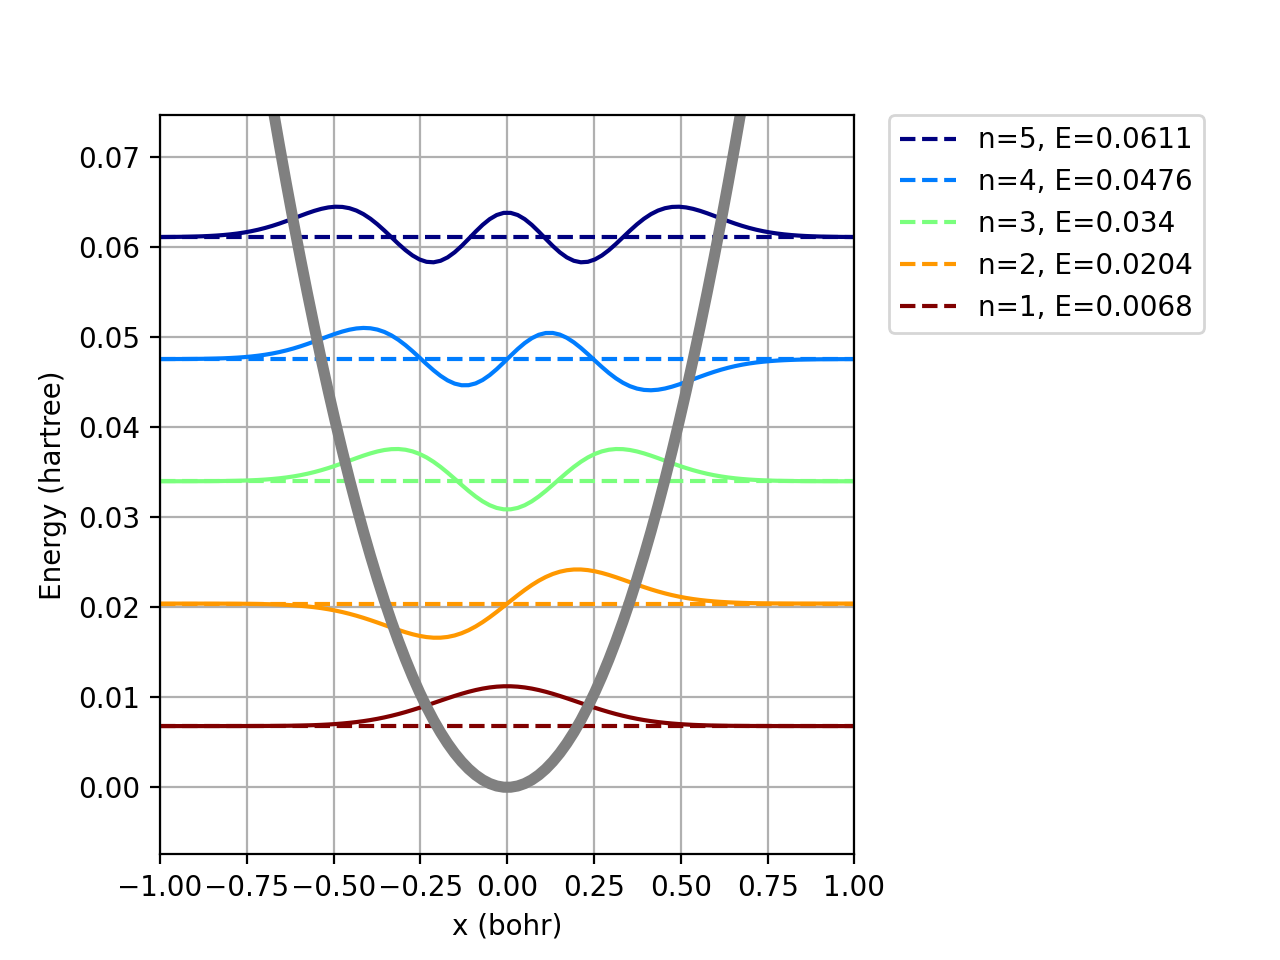

In [6]:
# Create a harmonic potential energy (Eq. 2) and put those values along the diagonal of a potential energy matrix.
Varray = 1/2*k*xvec**2
PE = AssignQuantity(np.diag(Varray.magnitude),Varray.units)

# Create the kinetic energy matrix using the usual 3-point finite-difference method
### BEGIN SOLUTION
Laplacian=(-2.0*np.diag(np.ones(nsteps))+np.diag(np.ones(nsteps-1),1)+np.diag(np.ones(nsteps-1),-1))/dx**2
KE = -0.5*hbar**2/mu*Laplacian
### END SOLUTION

# Create the Hamiltonian
### BEGIN SOLUTION
Hamiltonian = KE + PE
Hamiltonian.ito('hartree')
### END SOLUTION

# Diagonalize the Hamiltonian to get eigenfunctions and eigenenergies
### BEGIN SOLUTION
Epsi,psi = spla.eigh(Hamiltonian)
Epsi = AssignQuantity(Epsi,'hartree')
### END SOLUTION

# Specify the number of wavefunctions we want to look at, and plot
number_of_wavefunctions = 5
PL.plotter(Epsi,psi,xvec,PE,number_of_wavefunctions)

### A note about the way these states are assigned quantum numbers. 
In the plot you just made, you'll see that the quantum numbers start with $n=1$. You should be aware, however, that this state *is* the ground state; in the literature (and in the Introduction) this is conventionally referred to as $\psi_0$ (with energy $E_0$). The next state up is labeled here as $n=2$, but it is conventionally referred to as $\psi_1$ (with energy $E_1$).

### Making a prediction about an IR spectrum
In the cell below, compute the wavenumber of the fundamental transition, in $cm^{-1}$ (see Eqs. 5 & 6).

In [7]:
### BEGIN SOLUTION
Egap = Epsi[1]-Epsi[0]
wavenum = Egap/(h*c)
wavenum.ito('1/cm')
difference = (wavenum.magnitude-2943)/2943*100
print(wavenum.magnitude,difference)

### END SOLUTION

2985.7066613583547 1.4511267875757636


### Pause for analysis
Well, how'd your result line up with respect to the red line peak in Fig. 2? What's the %difference?

### BEGIN SOLUTION
The difference is about 2%.
### END SOLUTION

### Your turn
In the cell below, repeat the analysis you just carried out, but for DCl. Don't forget to use the new reduced mass based on the mass of D; you can find its mass from https://en.wikipedia.org/wiki/Deuterium. 

1.008 unified_atomic_mass_unit
35.453 unified_atomic_mass_unit
1.9057395040969385 unified_atomic_mass_unit
1.9057395040969385 unified_atomic_mass_unit
k = 0.31498630131570743 electron_mass / atomic_unit_of_time ** 2


/home/instructor/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:601: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = asarray(a, dtype=dtype, order=order)


<IPython.core.display.Javascript object>


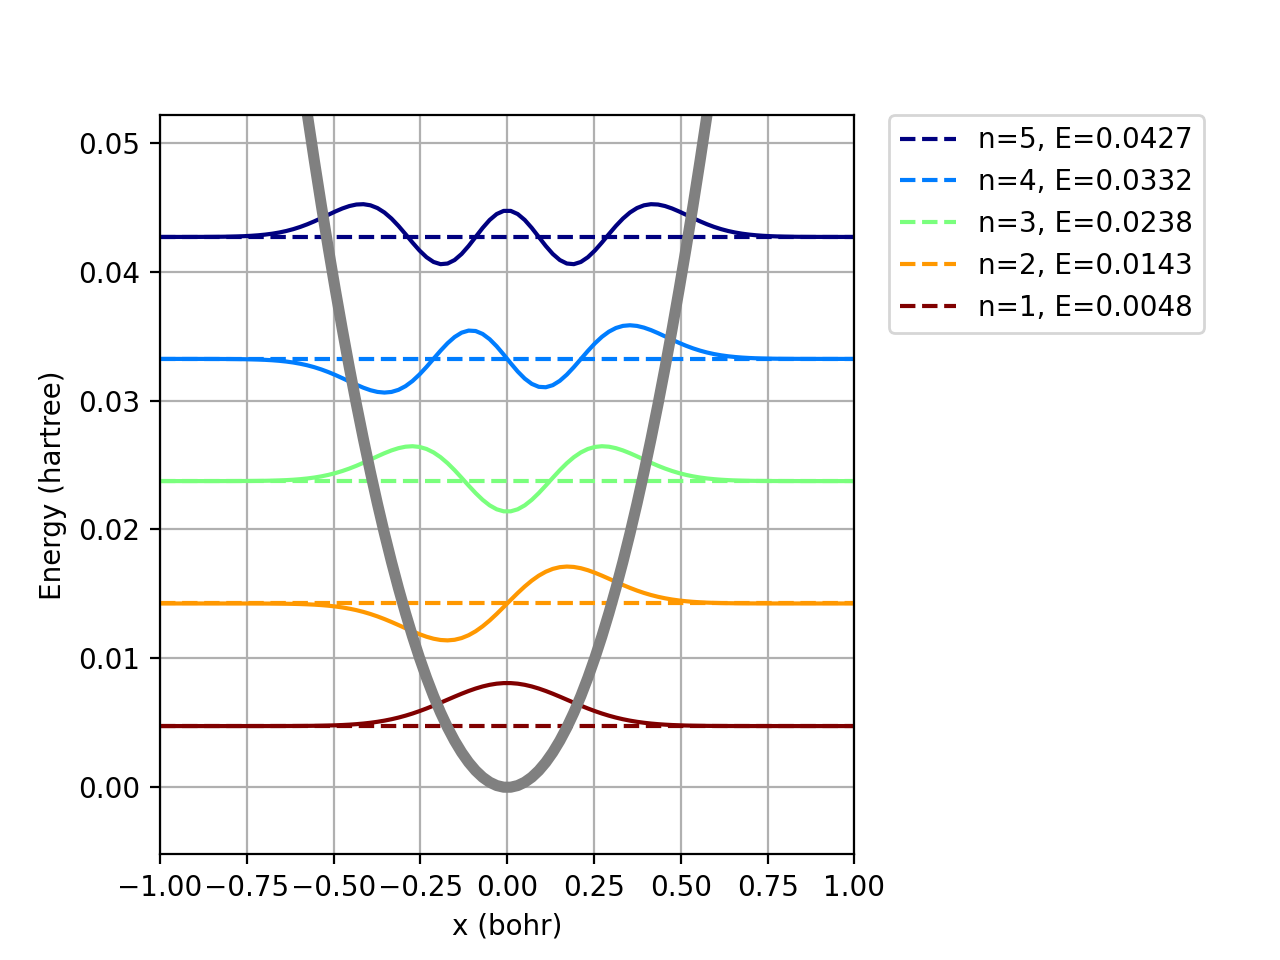

2086.881011969918 / centimeter


In [8]:
### BEGIN SOLUTION

# This is for DCl (mass of D taken from https://en.wikipedia.org/wiki/Deuterium)
mD = AssignQuantity(2.014,'amu')
# mD.ito('atomic_unit_of_mass')
print(mH)

mCl = AssignQuantity(35.453,'amu')
# mCl.ito('atomic_unit_of_mass')
print(mCl)

mu = mD*mCl/(mD+mCl)
print(mu)
print(mu.to('amu'))

k = AssignQuantity(4.904e5,'dyne/cm')
k.ito('electron_mass / atomic_unit_of_time**2')
print('k =', k)

# Create a Kinetiec energy matrix using the 3-point finite-difference method
Laplacian=(-2.0*np.diag(np.ones(nsteps))+np.diag(np.ones(nsteps-1),1)+np.diag(np.ones(nsteps-1),-1))/dx**2
KE = -0.5*hbar**2/mu*Laplacian

# Create a harmonic potential energy (Eq. 2) and put those values along the diagonal of a potential energy matrix.
Varray = 1/2*k*xvec**2
PE = AssignQuantity(np.diag(Varray.magnitude),Varray.units)

# Create the Hamiltonian
Hamiltonian = KE + PE
Hamiltonian.ito('hartree')

# Diagonalize the Hamiltonian yielding the wavefunctions and energies
Epsi,psi = spla.eigh(Hamiltonian)
Epsi = AssignQuantity(Epsi,'hartree')

# Specify the number of wavefunctions we want to look at
number_of_wavefunctions = 5

# Plot the wavefunctions
PL.plotter(Epsi,psi,xvec,PE,number_of_wavefunctions)

Egap = Epsi[1]-Epsi[0]
wavenum = Egap/(h*c)
print(wavenum.to('1/cm'))

### END SOLUTION

### Pause for analysis
There's a well-known effect in vibrational spectroscopy, the origin of which you probably have some personal experience in. It is that, all else equal, heavy objects tend to vibrate more slowly than light objects. This is called the *isotope effect*, and it is usually quantified as the reduction of the wavenumber of the heavier isotope's fundamental transition, compared to the lighter one. In the case of $DCl$, we'd say

$$
I_{effect} = \bigl ( 1 - {E_1(DCl)-E_0(DCl) \over E_1(HCl)-E_0(HCl)} \bigr ) \times 100
$$

So for example (referring to Fig. 2), if we saw that the red line in the spectrum of $DCl$ peaked at a wavenumber that is 20% lower (to the right) than where it does for $HCl$, we'd say $I_{effect}=20\%$.

In the cell below, use the results obtained above to predict the isotope effect for the fundamental of $DCl$, relative to $HCl$.

In [9]:
### BEGIN SOLUTION
top = 0.0143 - 0.0048
bot = 0.0204 - 0.0068
effect = (1-top/bot)*100
print(effect)

# A check
effect = (1-2086.88/2985.7)*100
print(effect)

### END SOLUTION

30.147058823529406
30.104163177814236


### Refreshing and saving your code
1. Use the dropdown menu Kernel/Restart
2. Use the dropdown menu Cell/Run All Above
3. Under the "File" dropdown menu item in the upper left is a disk icon. Press it now to save your work (you can, do this at any time as you're working on an assignment, actually).

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Finishing up
Assuming all this has gone smoothly, carry out three more steps (but read this carefully before starting):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page